In [1]:
# Import necessary libraries

import pandas as pd
from matplotlib import pyplot as plots
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the original dataset that contains RAW/ UNCLEANED data.
df_raw = pd.read_csv(r"C:\Users\visha\OneDrive\Desktop\NLP\Final project\processed data\OriginalDS.csv")
df_raw.head(10)

,hashtag,id,created_at,lang,author_id,text,public_metricsretweet_count,public_metricsreply_count,public_metricslike_count,public_metricsquote_count,...,id.1,geotype,geobbox,country_code,full_name,country,newest_id,oldest_id,result_count,next_token
0,#WarOnDrugs,4.174290e+17,2013-12-29T22:56:48.000Z,en,1.639174e+07,RT @truthout: Why the Right to a Fair Trial Do...,11.0,0.0,0.0,0.0,...,b046074b1030a44d,Feature,"[-74.107995, 40.666879, -74.0253309, 40.769124]",US,"Jersey City, NJ",United States,4.174290e+17,4.134530e+17,500.0,1jzu9lk96gu5npw15vg9msz0xn5d8bt0tp9fg88gal4t
1,#WarOnDrugs,4.174280e+17,2013-12-29T22:51:34.000Z,en,4.813894e+08,#warondrugs #newjimcrow #itsreal @RollingStone...,0.0,0.0,0.0,0.0,...,ea0a61fa0c646676,Feature,"[3.9418364, 51.8421131, 4.6013785, 52.0068016]",NL,"Rotterdam, The Netherlands",The Netherlands,4.134520e+17,4.106310e+17,494.0,1jzu9lk96gu5npw15vf0a7zy0wvyixygxxkr7ge7l75p
2,#WarOnDrugs,4.174270e+17,2013-12-29T22:49:46.000Z,en,4.158263e+08,@Aennie1 NSA's main target with WHITETAMALE is...,0.0,0.0,0.0,0.0,...,b49b3053b5c25bf5,Feature,"[-105.109815, 39.614151, -104.734372, 39.812975]",US,"Denver, CO",United States,4.106270e+17,4.083510e+17,499.0,1jzu9lk96gu5npw15silgorbm61ya0m6jzaxeb7itta5
3,#WarOnDrugs,4.174250e+17,2013-12-29T22:40:15.000Z,en,2.510128e+08,Colorado pot sales to begin in 2014 #warondrug...,0.0,0.0,0.0,0.0,...,2468025af2bcc4cb,Feature,"[-114.993892, 50.309675, -113.375347, 51.940658]",CA,"Division No. 6, Alberta",Canada,4.083500e+17,4.072140e+17,494.0,1jzu9lk96gu5npw15si68ww825furuhnemsedj6hilx9
4,#WarOnDrugs,4.174150e+17,2013-12-29T21:59:21.000Z,en,3.021527e+08,#Schumacher may die f/ skiing. Hypocritical t ...,0.0,0.0,1.0,0.0,...,e4a0d228eb6be76b,Feature,"[-75.280284, 39.871811, -74.955712, 40.13792]",US,"Philadelphia, PA",United States,4.072120e+17,4.048460e+17,497.0,1jzu9lk96gu5npw15sgx4wbt853rxphz16x5geh0n2wt
5,#WarOnDrugs,4.174150e+17,2013-12-29T21:59:07.000Z,en,4.158263e+08,.@Aennie1 These are new details on #Snowden d...,0.0,0.0,0.0,0.0,...,fef01a8cb0eacb64,Feature,"[-81.628444, 40.995137, -81.405059, 41.166618]",US,"Akron, OH",United States,4.048150e+17,4.024420e+17,497.0,1jzu9lk96gu5npw15sg2l5j7plkflwucix9vp4gvgs59
6,#WarOnDrugs,4.174120e+17,2013-12-29T21:50:09.000Z,en,2.557629e+08,The #Government spends about 20million dollars...,0.0,0.0,0.0,0.0,...,1b107df3ccc0aaa1,Feature,"[-73.991482, -33.7510506, -32.378186, 5.27192]",BR,Brazil,Brazil,4.024320e+17,4.008970e+17,500.0,1jzu9lk96gu5npw15sf8ii264zgt64k2yqqlz1yo24cd
7,#WarOnDrugs,4.173900e+17,2013-12-29T20:21:07.000Z,en,2.015286e+08,Father of missing boy admits checkered past; w...,0.0,0.0,0.0,0.0,...,2641d0d645fad2ab,Feature,"[-0.15191, 51.410792, -0.078902, 51.509887]",GB,"Lambeth, England",United Kingdom,4.008930e+17,4.004000e+17,500.0,1jzu9lk96gu5npw15sf87ufij9xejdtdxqkdnrqdxmyl
8,#WarOnDrugs,4.173750e+17,2013-12-29T19:22:07.000Z,en,1.411389e+09,"#WarOnDrugs RT @CNN: On Jan 1, Colorado will b...",0.0,0.0,0.0,0.0,...,13f1b1eadfb47f9b,Feature,"[-71.178586, 42.29466, -71.105725, 42.351818]",US,"Brookline, MA",United States,4.004000e+17,3.992160e+17,495.0,1jzu9lk96gu5npw0l92nrxbxgfwno56qky1d0bp3dhtp
9,#WarOnDrugs,4.173710e+17,2013-12-29T19:07:55.000Z,en,2.844395e+07,A Civil Servant in Mexico Tests U.S. on Asylum...,0.0,0.0,0.0,0.0,...,4ec01c9dbc693497,Feature,"[-87.634643, 24.396308, -79.974307, 31.001056]",US,"Florida, USA",United States,3.992150e+17,3.977810e+17,490.0,1jzu9lk96gu5npw0l91trf65fm1rfpam4kftdzfu7fy5


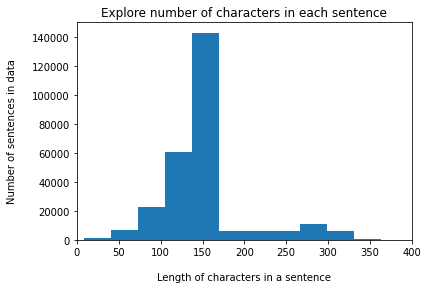

In [8]:
# Number of characters in each sentences.
fig, ax = plots.subplots()
df_raw["text"].str.len().hist(bins =30);
plots.grid(visible = None)
plots.xlabel("Length of characters in a sentence", labelpad = 15)
plots.ylabel("Number of sentences in data", labelpad = 15)
ax.set_xlim([0,400])
ax.set_title("Explore number of characters in each sentence");

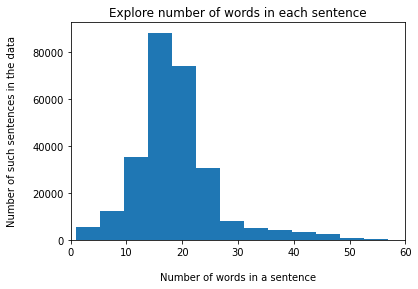

In [9]:
# Number of words in each tweet.
df_raw['totalwords'] = df_raw['text'].str.count(' ') + 1 # COunt spaces and add 1 to it.

fig, ax = plots.subplots();
df_raw['totalwords'].hist(bins = 30);
plots.grid(visible = None)
plots.xlabel("Number of words in a sentence", labelpad = 15)
plots.ylabel("Number of such sentences in the data", labelpad = 15)
ax.set_xlim([0,60])
ax.set_title("Explore number of words in each sentence");

In [10]:
df_raw = df_raw[df_raw["text"].notna()]

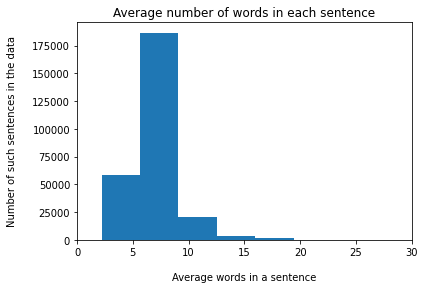

In [11]:
import numpy as np

def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist(bins = 40)

fig, ax = plots.subplots();
plot_word_length_histogram(df_raw['text'])
plots.grid(visible = None)
plots.xlabel("Average words in a sentence", labelpad = 15)
plots.ylabel("Number of such sentences in the data", labelpad = 15)
ax.set_xlim([0,30])
ax.set_title("Average number of words in each sentence");

In [12]:
# Count occurence of stop words.
import matplotlib.pyplot as plots
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15] 
    x,y=zip(*top)
    plots.bar(x,y)

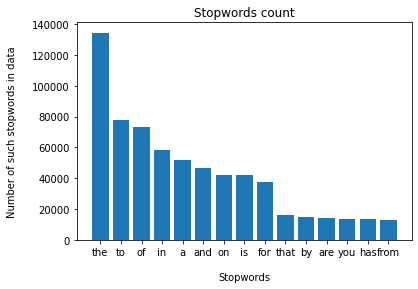

In [13]:
fig, ax = plots.subplots();
plot_top_stopwords_barchart(df_raw['text'])
plots.xlabel("Stopwords", labelpad = 15);
plots.ylabel("Number of such stopwords in data", labelpad = 15);
ax.set_title("Stopwords count");

In [14]:
# Import clean data
df_clean = pd.read_csv(r"C:\Users\visha\OneDrive\Desktop\NLP\Final project\processed data\Final.csv")
df_clean.head(10)
df_clean = df_clean[df_clean["CleanedTweet"].notna()]

In [15]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:28]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

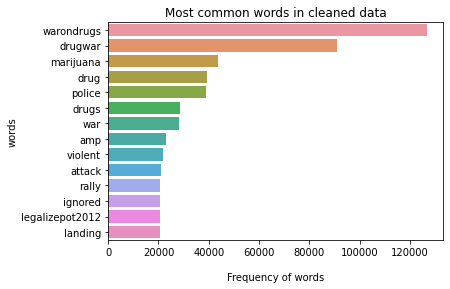

In [16]:
fig, ax = plots.subplots();
plot_top_non_stopwords_barchart(df_clean["CleanedTweet"]);
plots.xlabel("Frequency of words", labelpad = 15);
plots.ylabel("words");
ax.set_title("Most common words in cleaned data");

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:18]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

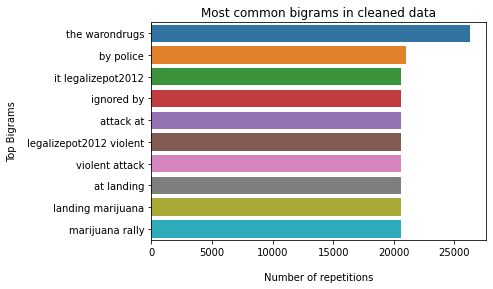

In [77]:
fig, ax = plots.subplots();
plot_top_ngrams_barchart(df_clean["CleanedTweet"],2)
plots.xlabel("Number of repetitions", labelpad = 15);
plots.ylabel("Top Bigrams", labelpad = 10);
ax.set_title("Most common bigrams in cleaned data");

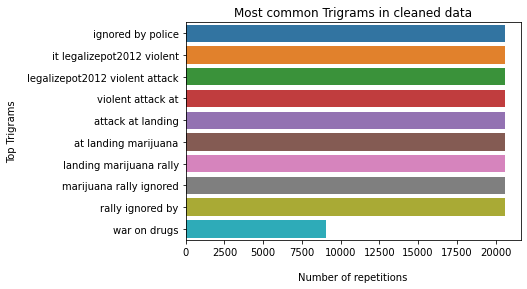

In [78]:
fig, ax = plots.subplots();
plot_top_ngrams_barchart(df_clean["CleanedTweet"],3)
plots.xlabel("Number of repetitions", labelpad = 15);
plots.ylabel("Top Trigrams", labelpad = 10);
ax.set_title("Most common Trigrams in cleaned data");